In [1]:
# Setting up the notebook
import sys
import os

# Import local libraries
sys.path.append('../exercises_complements')
from shared_functions import check_task_with_solution
from darcy_functions import launch_darcy_experiment_interactive
from darcy_several_layers_keq import exercise_aquifers_layered_keq_attribution


## <br> Task 1: <br>

This exercise helps you to familiarize with Darcy law, for 1D and steady state conditions.

Horizontal saturated groundwater flow are established in soil layers with following properties :
- length $L$ : 100 $\text{m}$
- specific discharge at in- and out- flow per unit area ($A = 1\text{m}^2$): $q = 3 \cdot 10^{-7}\text{m}^2\text{s}^{-1}$
- negligible groundwater recharge

Each soil is a combination of vertical or horizontal layers, each layer having a given hydraulic conductivities $K$. 
Possible values in $\mu\text{m}\cdot\text{s}^{-1}$ are : **$K_0=5$, $K_1=10$, $K_2=20$, $K_3=50$**.


**Your task is to fill the table below**, where you should enter for each of the 6 soils (schematic (a) to (f)): 
- Line 1 : its equivalent hydraulic conductivity $K_{eq}$
- Line 2 : the number of its $h(x)$ profile plot.
    

**Submission Table :**<br> 

GridBox(children=(Label(value='Schematic:', layout=Layout(align_items='center', border_bottom='solid 1px black…

Button(description='Submit', layout=Layout(height='30px', width='100px'), style=ButtonStyle())

Output()

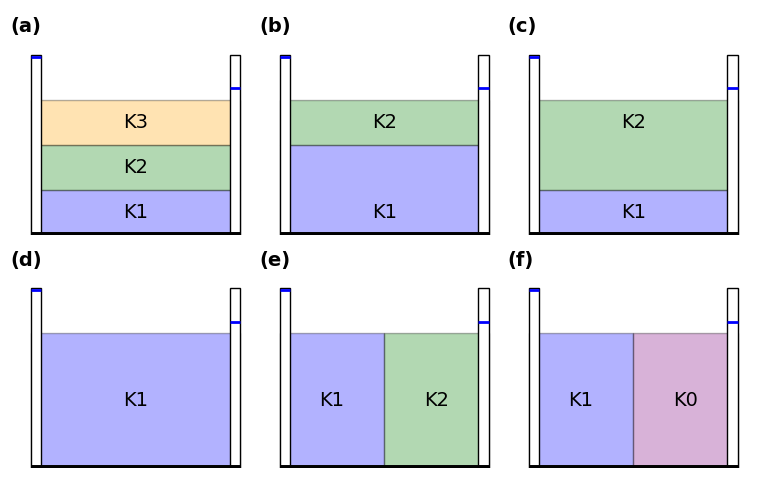

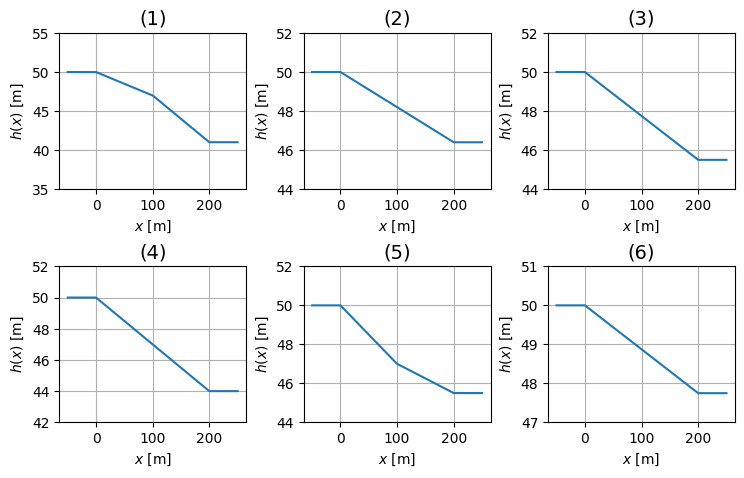

In [2]:
# First task 
exercise_aquifers_layered_keq_attribution()


## Task 2:
Estimate the water table level (in meter) at the interface $x$ = 100m for the following confined aquifer :


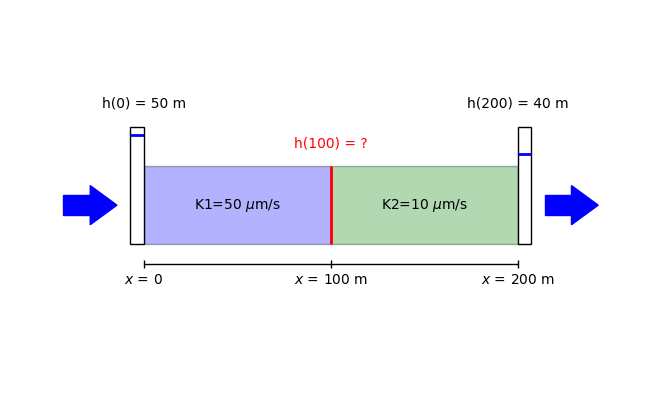

Output()

Button(description='Show Solution', disabled=True, style=ButtonStyle())

Output()

In [3]:
# Second task -- work still ongoing
check_task_with_solution("task04_1")

In [4]:
5e-6*(43.3-50)/(100)

-3.3500000000000013e-07